In [ ]:
                                        Temperature Forecast Project using ML
Project Overview:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model 
operated by the Korea Meteorological Administration over Seoul, South Korea. In this project we have the data consists of 
summer data 2103 to 2017. To build a model for to find the minimum temperature for the next day and maximum temperature for
the next day.   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


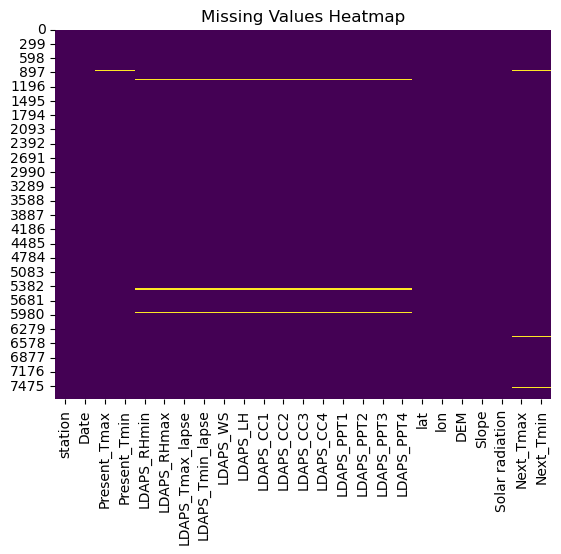

Missing values after dropping rows with missing targets:
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64
Next_Tmax Model - MSE: 0.95, R-squared: 0.90
Next_Tmin Model - MSE: 0.59, R-squared: 0.90


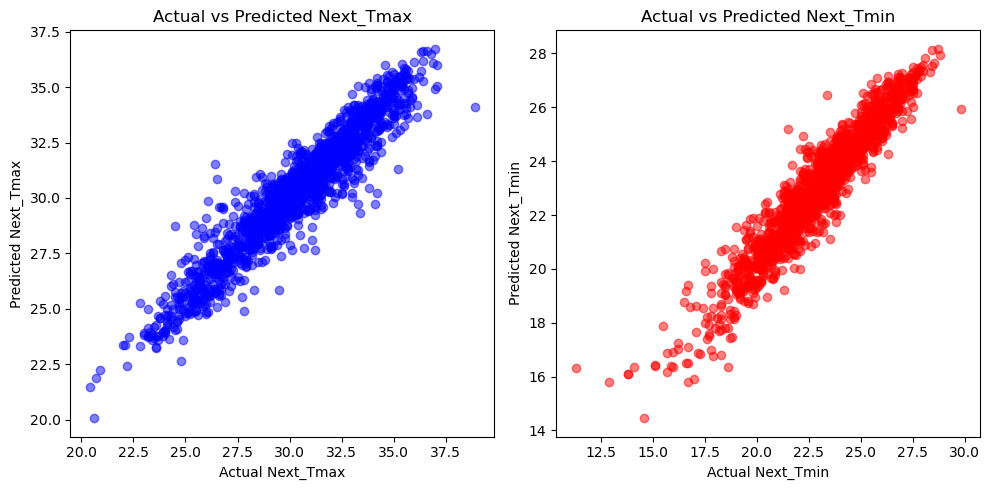

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Make sure plots show inline
%matplotlib inline

# Step 1: Load the dataset
url = "https://github.com/dsrscientist/Dataset2/raw/main/temperature.csv"
data = pd.read_csv(url)

# Step 2: EDA - Basic insights
data.info()

# Check for summary statistics
print(data.describe())

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Heatmap for missing values
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Step 3: Data Preprocessing
# Convert 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Drop irrelevant columns
columns_to_drop = ['station', 'Date']  # You can add more if necessary
data = data.drop(columns=columns_to_drop, axis=1)

# Drop rows with missing values in the target columns (Next_Tmax, Next_Tmin)
data.dropna(subset=['Next_Tmax', 'Next_Tmin'], inplace=True)

# Check for remaining missing values
print("Missing values after dropping rows with missing targets:")
print(data.isnull().sum())

# Fill other missing values (if any) with forward fill method
data.fillna(method='ffill', inplace=True)

# Step 4: Feature and target split for both Next_Tmax and Next_Tmin
X = data.drop(['Next_Tmax', 'Next_Tmin'], axis=1)  # Features for both models

# Target variables
y_max = data['Next_Tmax']  # Target for max temperature
y_min = data['Next_Tmin']  # Target for min temperature

# Step 5: Splitting the dataset into training and testing sets
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_max_scaled = scaler.fit_transform(X_train_max)
X_test_max_scaled = scaler.transform(X_test_max)

X_train_min_scaled = scaler.fit_transform(X_train_min)
X_test_min_scaled = scaler.transform(X_test_min)

# Step 7: Model Building
# Model for Next_Tmax prediction
model_max = RandomForestRegressor(n_estimators=100, random_state=42)
model_max.fit(X_train_max_scaled, y_train_max)

# Model for Next_Tmin prediction
model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_min.fit(X_train_min_scaled, y_train_min)

# Step 8: Model Evaluation
# Evaluate the model for Next_Tmax
y_pred_max = model_max.predict(X_test_max_scaled)
mse_max = mean_squared_error(y_test_max, y_pred_max)
r2_max = r2_score(y_test_max, y_pred_max)
print(f"Next_Tmax Model - MSE: {mse_max:.2f}, R-squared: {r2_max:.2f}")

# Evaluate the model for Next_Tmin
y_pred_min = model_min.predict(X_test_min_scaled)
mse_min = mean_squared_error(y_test_min, y_pred_min)
r2_min = r2_score(y_test_min, y_pred_min)
print(f"Next_Tmin Model - MSE: {mse_min:.2f}, R-squared: {r2_min:.2f}")

# Step 9: Plotting the results for better visualization
plt.figure(figsize=(10, 5))

# Plot Next_Tmax results
plt.subplot(1, 2, 1)
plt.scatter(y_test_max, y_pred_max, color='blue', alpha=0.5)
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('Actual vs Predicted Next_Tmax')

# Plot Next_Tmin results
plt.subplot(1, 2, 2)
plt.scatter(y_test_min, y_pred_min, color='red', alpha=0.5)
plt.xlabel('Actual Next_Tmin')
plt.ylabel('Predicted Next_Tmin')
plt.title('Actual vs Predicted Next_Tmin')

plt.tight_layout()
plt.show()


In [ ]:
To build separate machine learning models for predicting the next day minimum (Next_Tmin) and maximum 
temperatures (Next_Tmax), we will go through the following steps:

Load the dataset.
Exploratory Data Analysis (EDA): Understanding the dataset (checking for null values, correlation analysis, etc.).
Data Preprocessing: Handle missing values, scale numeric features, and encode any categorical features.
Splitting the dataset: Create separate target variables for Next_Tmax and Next_Tmin, while using the other features for 
prediction.
Model Building: Train separate models for Next_Tmax and Next_Tmin prediction using algorithms like Linear Regression or
RandomForestRegressor.
Model Evaluation: Use metrics like Mean Squared Error (MSE) and R-squared (R²) to evaluate the models.
Prediction: Use the trained models to make predictions on the test data.
